<a href="https://colab.research.google.com/github/cynthiatcelorio/ML_Clustering/blob/main/dani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# librerias
from glob import glob
import matplotlib.pyplot as plt
from skimage import color
from skimage.color import rgb2gray

from skimage import io

In [ ]:
!git clone "https://github.com/cynthiatcelorio/ML_Clustering_Data.git"

ruta_train = "/content/ML_Clustering_Data/train"
ruta_test = "/content/ML_Clustering_Data/test"

fatal: destination path 'ML_Clustering_Data' already exists and is not an empty directory.


In [ ]:
train_images = glob('/content/ML_Clustering_Data/train/*')

In [ ]:
len(train_images)

7889

### Preprocesamiento de las imágenes

Antes de extraer características de las imágenes, tenemos que llevar a cabo un preprocesamiento para poder comparar las imágenes en lo referente a color y valor.

In [ ]:
# %pip install clustimage

In [ ]:
from clustimage import Clustimage

[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]


[19 42 40 ... 23 46 44]


(-0.5, 127.5, 127.5, -0.5)

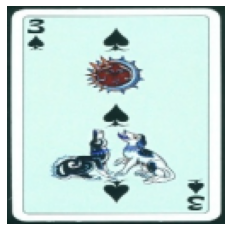

In [ ]:
# CON ESTO LEO Y MUESTRO IMAGENES DE MOMENTO (MEDIO SUCIO)

# Inicializar
cl = Clustimage()

# Cargar dataset
# me falta hacer un array de imagenes supongo, no se que diferencia hay con el glob
"""
images_entrenamiento = []

for i in train_images:
    img = cl.imread(train_images[10], dim=(128, 128), colorscale=1, flatten=True)
    images_entrenamiento.append(img)
"""
img = cl.imread(train_images[1980], dim=(128, 128), colorscale=1, flatten=True)

print(img)


# proximo objetivo: plottear como 9 a la vez, mirar por algun lado
plt.figure()
plt.imshow(img.reshape(128,128,3))
plt.axis('off')

In [ ]:
#IDEA: PASAR TODO A BLANCO Y NEGRO Y PASAR A BLANCO (255) LO QUE ESTE POR ENCIMA DE YOQUESE 102
#ejemplo breve:

TypeError: ignored

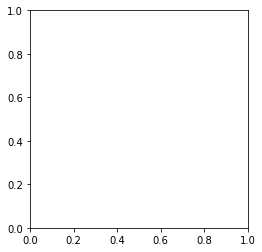

In [ ]:
imgb = color.rgb2gray(img)

"""
mask = img < 87
img[mask] = 255
"""

plt.figure()
plt.imshow(imgb)
plt.axis('off')